In [1]:
import os
import numpy as np
import cv2  # Import OpenCV
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Data Preparation
data_path = "/Users/rishipal/SynologyDrive/Drive/Personal develop/UNCC Health Informatics/UNCC_Courses/09_Spring 2024/DSBA6165/Group Project/RiceLeafDiseaseImages"
#data_path = "/content/drive/MyDrive/DSBA6165_Group_Project/RiceLeafDiseaseImages"

In [3]:
def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    for label, class_name in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                image = cv2.imread(img_path)  # Read image using OpenCV
                if image is not None:
                    # Resize the image to a consistent size
                    image = cv2.resize(image, target_size)
                    images.append(image)
                    labels.append(label)

    # Ensure all images have the same shape
    max_shape = max(image.shape for image in images)
    for i, image in enumerate(images):
        images[i] = cv2.resize(image, max_shape[:2])

    # Print the shapes of all images
    for image in images:
        print(image.shape)

    return images, labels

# Load images and labels
images, labels = load_images_from_folder(data_path)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [4]:
# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [6]:
# Step 2: Model Definition
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MultiHeadAttention

num_classes = 10  # Define the number of classes

class GraphConvLayer(keras.layers.Layer):
    def __init__(self, filters, kernel_size, **kwargs):
        super(GraphConvLayer, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size

    def build(self, input_shape):
        self.conv = Conv2D(self.filters, self.kernel_size, activation='relu', padding='same')

    def call(self, inputs):
        return self.conv(inputs)


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

class GCNWithAttention(keras.Model):
    def __init__(self, num_classes):
        super(GCNWithAttention, self).__init__()
        # Define your layers here
        self.conv1 = GraphConvLayer(64, (3, 3))
        self.conv2 = GraphConvLayer(64, (3, 3))
        self.conv3 = Conv2D(32, (3, 3), activation='relu')
        self.pool = MaxPooling2D((2, 2))
        self.flatten = Flatten()
        self.fc1 = Dense(128, activation='relu')
        self.fc2 = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        # Define the forward pass
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [8]:
# Create an instance of the model
#self.attention = MultiHeadAttention(num_heads=8, key_dim=64)

gcn_model = GCNWithAttention(num_classes)


In [9]:
# Compile the model
gcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
gcn_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 921s 8s/step - accuracy: 0.4581 - loss: 2.2387 - val_accuracy: 0.6681 - val_loss: 0.8711
Epoch 2/10


KeyboardInterrupt: 

In [11]:
history = gcn_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 906s 8s/step - accuracy: 0.7497 - loss: 0.6836 - val_accuracy: 0.7798 - val_loss: 0.5818
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 5781s 49s/step - accuracy: 0.8801 - loss: 0.3428 - val_accuracy: 0.8915 - val_loss: 0.3329
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1076s 8s/step - accuracy: 0.9608 - loss: 0.1282 - val_accuracy: 0.9157 - val_loss: 0.3319
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 926s 8s/step - accuracy: 0.9795 - loss: 0.0807 - val_accuracy: 0.9505 - val_loss: 0.2905
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 823s 7s/step - accuracy: 0.9946 - loss: 0.0206 - val_accuracy: 0.9115 - val_loss: 0.3322
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 756s 6s/step - accuracy: 0.9629 - loss: 0.1294 - val_accuracy: 0.8704 - val_loss: 0.4908
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 756s 6s/step - accuracy: 0.9628 - loss: 0.1381 - val_accuracy: 0.9494 - val_loss: 0.2749
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 779s 7s/step - accuracy: 0.9981 - loss: 0.0080 - val_a

In [13]:
# Step 5: Model Evaluation
# Evaluate the model on the test set
test_loss, test_accuracy = gcn_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

38/38 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9625 - loss: 0.2984
Test Accuracy: 0.9604043960571289


In [16]:
import matplotlib.pyplot as plt

# Get training history
history = gcn_model.history.history

In [17]:
# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

KeyError: 'accuracy'

In [19]:
import matplotlib.pyplot as plt

# Get training history
history = gcn_model.history.history

# Check the keys present in the history object
print(history.keys())


dict_keys([])


In [21]:
# Train the model
history = gcn_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 859s 7s/step - accuracy: 1.0000 - loss: 3.3342e-04 - val_accuracy: 0.9610 - val_loss: 0.2886
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 845s 7s/step - accuracy: 1.0000 - loss: 1.9984e-04 - val_accuracy: 0.9600 - val_loss: 0.2990
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 12854s 109s/step - accuracy: 1.0000 - loss: 1.5345e-04 - val_accuracy: 0.9589 - val_loss: 0.3108
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1022s 9s/step - accuracy: 1.0000 - loss: 1.2271e-04 - val_accuracy: 0.9589 - val_loss: 0.3155
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 872s 7s/step - accuracy: 1.0000 - loss: 9.7622e-05 - val_accuracy: 0.9568 - val_loss: 0.3209
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 775s 7s/step - accuracy: 1.0000 - loss: 8.5405e-05 - val_accuracy: 0.9579 - val_loss: 0.3245
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 781s 7s/step - accuracy: 1.0000 - loss: 5.4526e-05 - val_accuracy: 0.9568 - val_loss: 0.3259
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 777s 7s/step - accuracy:

TypeError: 'History' object is not subscriptable

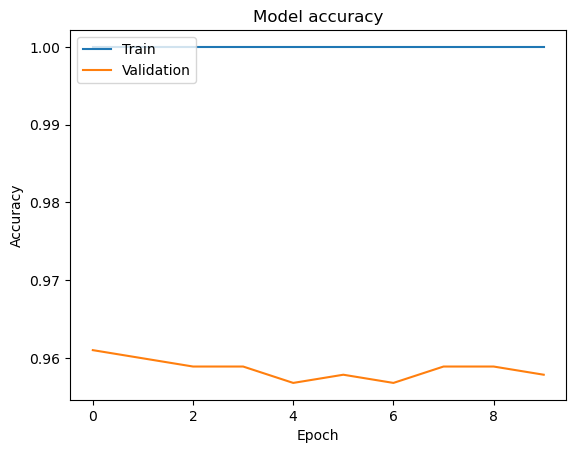

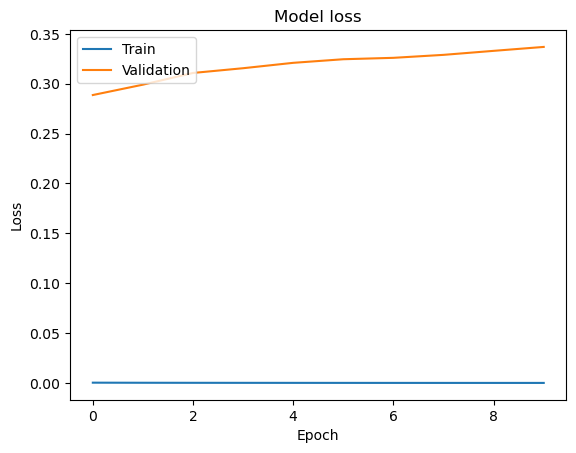

In [22]:
# Train the model
# history = gcn_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode="wb")
pickle.dump(gcn_model, pickle_out)
pickle_out.close()